In [1]:
import pyipn
from pyipn.io import import_lc
from pyipn.io.orbits import tle
from pyipn.geometry import Location
import pdb

import h5py
from astropy.coordinates import SkyCoord, CartesianRepresentation
from astropy.time import Time, TimeDelta
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [9]:
tle_G = 'Glast2018_01_01 00_00_00__2019_12_31 00_00_00_tle.txt'
ran = np.linspace(-2., 2., num=40)

with h5py.File("/home/msinghart/data/lc/GBM_TRIGDAT/gbm_trigdat.hdf5", 'r') as f:
    offset=[]
    #randiff = []
    #for j in ran:
    differences =[]
    for grp in f:
        grp = f[grp]
        loc = grp['position'][0]
        trigtime = Time.strptime(grp.attrs['trigtime'], '%Y-%m-%d_%H:%M:%S.%f')
        start = Time.strptime(grp.attrs['start_utc'], '%Y-%m-%d_%H:%M:%S.%f')+TimeDelta(3.85, format='sec')
        start_dt = start.to_datetime()
        skycoord = SkyCoord(x=loc[0], y=loc[1], z=loc[2], representation_type="cartesian", unit="km", frame='gcrs')
        loc_trigdat = skycoord.transform_to('gcrs')
        tle_pos = tle.position_skyfield(start_dt, tle_G)
        loc_tle = SkyCoord(x=tle_pos[0], y=tle_pos[1], z=tle_pos[2], representation_type="cartesian", unit="km", frame='gcrs')

#         aran = []
#         for j in ran:
#             start_dtj = start_dt + dt.timedelta(seconds=j)
#             tlej_pos = tle.position_skyfield(start_dtj, tle_G)
#             loc_tlej = SkyCoord(x=tlej_pos[0], y=tlej_pos[1], z=tlej_pos[2], representation_type="cartesian", unit="km", frame='gcrs')
#             aran.append(np.linalg.norm(loc_trigdat.cartesian.xyz.value-loc_tlej.cartesian.xyz.value))

#         aran = np.array(aran)

        line1, line2 = tle.find_closest_epoch(start_dt, tle_G)
        elem = line1.split()
        t=float(elem[3][2:])-1.
        epoch = Time(dt.datetime(2018,1,1,0,0,0), format='datetime', scale='ut1') + TimeDelta(t, format='jd', scale='ut1')
        dt_ = epoch.to_datetime() - start_dt

        print(start_dt - epoch.to_datetime())
        print('trigdat: '+str(loc_trigdat.represent_as(CartesianRepresentation).xyz))
        print('tle:     '+str(loc_tle.cartesian.xyz))
        
        difference = np.linalg.norm(loc_trigdat.cartesian.xyz.value-loc_tle.represent_as(CartesianRepresentation).xyz.value)
        print('difference: '+str(difference)+' km')

        differences.append(difference)
        #print('time offset where tle and trigdat match best: '+str(ran[np.argmin(aran)]))
        #offset.append(ran[np.argmin(aran)])
        #print(np.min(aran))
        #plt.plot(ran, aran)
        #plt.axvline(x=dt_.total_seconds())
        #plt.show()
        print("")

    differences = np.array(differences)
    offset = np.array(offset)
        #randiff.append(np.sum(differences))
    #randiff=np.array(randiff)
    #print(randiff)

-1 day, 18:54:06.097376
trigdat: [ 5876.5         2177.5        -2927.74999999] km
tle:     [ 5880.43808436  2178.65465614 -2919.70384994] km
difference: 9.032290406185114 km

-1 day, 20:34:57.895136
trigdat: [ 5338.25        3630.50000004 -2481.5       ] km
tle:     [ 5340.47477669  3629.18600113 -2478.80529845] km
difference: 3.7333149982844467 km

1:37:40.768136
trigdat: [-593.00000001 6858.74999999  519.        ] km
tle:     [-597.08711889 6859.73111922  506.48887065] km
difference: 13.1983140284556 km

-1 day, 12:10:34.189232
trigdat: [  782.74999999 -6826.00000001  -773.49999999] km
tle:     [  785.89290815 -6827.43063196  -760.04641253] km
difference: 13.889693842048377 km

-1 day, 20:37:52.975232
trigdat: [ 5139.74999998  4116.25000002 -2113.75000001] km
tle:     [ 5142.4508292   4113.09516738 -2114.21017907] km
difference: 4.178422213446789 km

-1 day, 22:13:23.129048
trigdat: [ 5510.75        3638.74999999 -2058.5       ] km
tle:     [ 5510.52338692  3640.29676037 -2056.73567

1:00:22.944496
trigdat: [ 6473.5         -832.25       -2249.50000001] km
tle:     [ 6480.17835559  -830.03418816 -2231.12673363] km
difference: 19.674531070441937 km

0:33:21.400768
trigdat: [-1635.75       -6268.75        2405.24999999] km
tle:     [-1638.13340836 -6267.02923717  2409.37485073] km
difference: 5.0651805228099755 km

-1 day, 22:42:02.907712
trigdat: [-6348.25        -343.75000001  2716.        ] km
tle:     [-6354.98495914  -345.16550899  2700.66173215] km
difference: 16.811478244319467 km

1:57:23.974256
trigdat: [-5741.75000001 -2438.25000002  2979.74999999] km
tle:     [-5748.11008032 -2437.59688584  2969.22241887] km
difference: 12.31694540084434 km

-1 day, 19:00:15.788624
trigdat: [ 2976.25  5735.5  -2431.75] km
tle:     [ 2978.14037843  5734.07021525 -2433.13099606] km
difference: 2.7431669966161865 km

-1 day, 20:42:31.970616
trigdat: [  834.99999999  6715.75       -1370.24999999] km
tle:     [  833.31919623  6714.233712   -1379.1044903 ] km
difference: 9.13926

3:09:29.216488
trigdat: [-6351.50000002  2717.50000002  -116.74999999] km
tle:     [-6353.82990813  2711.20406353  -138.30516511] km
difference: 22.57636886816234 km

4:32:36.572488
trigdat: [-2663.25        5992.49999998 -2202.25      ] km
tle:     [-2657.92782542  5990.04539692 -2215.66387509] km
difference: 14.6383968863748 km

9:30:20.340488
trigdat: [-6343.50000001  2738.75000001   -23.75      ] km
tle:     [-6346.46386664  2731.77610904   -44.99853772] km
difference: 22.559255655331253 km

-1 day, 17:41:45.222360
trigdat: [-6285.75        2835.49999999   439.99999999] km
tle:     [-6289.66298189  2830.6482055    418.33524401] km
difference: 22.54357976706017 km

-1 day, 19:25:27.196360
trigdat: [-6585.5         -661.99999999  1960.74999999] km
tle:     [-6591.15507407  -665.93311772  1941.27870047] km
difference: 20.65383216117035 km

-1 day, 22:27:32.026360
trigdat: [-6297.00000001  2792.99999999   536.74999998] km
tle:     [-6300.98622938  2789.11344062   514.97139284] km
diffe

0:12:58.617160
trigdat: [2597.75000002 5985.24999998 2259.00000001] km
tle:     [2592.78464184 5989.01358045 2256.27704686] km
difference: 6.799543634676556 km

5:33:25.066288
trigdat: [-6557.75        2194.00000003  -132.00000001] km
tle:     [-6557.90157281  2193.86415694  -130.13322476] km
difference: 1.877838518997618 km

-1 day, 22:02:10.761176
trigdat: [-2725.25000001 -5620.74999999 -2972.75      ] km
tle:     [-2721.59133555 -5619.91539382 -2978.37324   ] km
difference: 6.760415755329371 km

4:35:04.884088
trigdat: [ 2301.25       -6247.49999999 -1856.75000001] km
tle:     [ 2304.34865085 -6244.75026626 -1862.14366798] km
difference: 6.801053370628549 km

7:20:52.303088
trigdat: [-6408.25       -1309.25000001 -2258.75      ] km
tle:     [-6406.18242778 -1312.61351836 -2262.78285957] km
difference: 5.643763544890033 km

-1 day, 15:35:04.554296
trigdat: [-5414.74999999 -3295.24999999 -2776.50000001] km
tle:     [-5409.75466125 -3298.96811327 -2782.06638245] km
difference: 8.352388

-1 day, 22:53:03.802832
trigdat: [-6263.25   414.5   2859.  ] km
tle:     [-6266.99086482   415.32463468  2851.4639227 ] km
difference: 8.45378926238279 km

5:10:20.814728
trigdat: [-5609.50000001  2699.49999999  2975.75      ] km
tle:     [-5613.37033563  2702.00865802  2967.05645785] km
difference: 9.841267098212981 km

7:56:51.987728
trigdat: [3157.25000002 6146.5         282.5       ] km
tle:     [3153.43715594 6148.98416122  276.07351583] km
difference: 7.874549872327196 km

-1 day, 18:27:22.193112
trigdat: [-3728.5        -5807.00000001   -53.5       ] km
tle:     [-3722.29315801 -5811.17796805   -50.07029209] km
difference: 8.230625779084937 km

8:38:52.274976
trigdat: [-5471.75000001 -4126.25000003   795.5       ] km
tle:     [-5468.94055243 -4130.20221985   796.41721427] km
difference: 4.9350095499666535 km

2:14:58.335600
trigdat: [-6553.25       -1603.75000001  1445.25      ] km
tle:     [-6553.0579605  -1606.93573211  1443.76204612] km
difference: 3.521331413877287 km

-1 d

1:14:22.521416
trigdat: [ 1249.75        6132.         -2918.99999999] km
tle:     [ 1253.87000513  6131.12548979 -2919.35092601] km
difference: 4.226388459654957 km

4:35:53.684416
trigdat: [-3537.24999999  5682.24999999 -1716.25      ] km
tle:     [-3538.3721786   5677.08014508 -1731.08956489] km
difference: 15.75434450985381 km

-1 day, 19:48:27.100352
trigdat: [ 1221.25000001 -6379.75        2356.75000001] km
tle:     [ 1220.72957214 -6377.00280832  2365.21023077] km
difference: 8.910298077783022 km

6:51:57.913448
trigdat: [ -317.5        -6399.50000002  2591.25      ] km
tle:     [ -322.52901072 -6397.29834271  2596.83921528] km
difference: 7.834383905129973 km

-1 day, 21:14:52.948760
trigdat: [-3247.         -5327.50000001  2977.75      ] km
tle:     [-3253.84898328 -5325.90737883  2973.08129018] km
difference: 8.440489650159336 km

1:28:35.858760
trigdat: [-3362.74999999  5908.74999999 -1223.        ] km
tle:     [-3361.84657471  5905.75075037 -1240.36483308] km
difference: 17

7:25:27.707352
trigdat: [-5801.99999999  2570.75000001 -2723.25      ] km
tle:     [-5798.42187078  2573.38247598 -2728.72188758] km
difference: 7.048013345456394 km

9:05:32.678352
trigdat: [-6224.50000001   405.50000001 -2959.24999999] km
tle:     [-6219.81471037   408.80463008 -2969.23680411] km
difference: 11.515588361978557 km

7:56:50.457504
trigdat: [  -18.24999998 -6898.25000001   284.5       ] km
tle:     [  -15.68876124 -6898.96492979   272.31590381] km
difference: 12.470896858770423 km

-1 day, 23:08:36.480576
trigdat: [4605.99999999 5108.00000001  726.5       ] km
tle:     [4601.68224514 5109.49338669  746.45770456] km
difference: 20.47396350811896 km

2:14:04.539576
trigdat: [5800.50000001 3418.75000001 1573.5       ] km
tle:     [5794.9406954  3419.65593346 1594.27025384] km
difference: 21.520456023736767 km

7:54:40.690576
trigdat: [-3867.75 -5713.    -135.75] km
tle:     [-3862.64878345 -5716.14546778  -153.84823094] km
difference: 19.064688321804404 km

-1 day, 22:20:4

-1 day, 16:05:40.955568
trigdat: [6853.50000001 -793.75        222.        ] km
tle:     [6854.14885389 -787.74439118  223.6505694 ] km
difference: 6.262006710765479 km

-1 day, 21:11:55.710568
trigdat: [1991.74999999 5903.5        2957.74999999] km
tle:     [1986.9666615  5904.41874798 2960.15137083] km
difference: 5.430562297832674 km

6:40:13.168568
trigdat: [3200.75       5388.50000002 2877.75      ] km
tle:     [3199.23310009 5388.30260161 2880.17228517] km
difference: 2.864858974292027 km

-1 day, 12:55:21.354200
trigdat: [ 6726.25000001 -1545.           194.24999998] km
tle:     [ 6727.2001296  -1541.02616359   194.83581806] km
difference: 4.127627033441264 km

-1 day, 17:36:12.639288
trigdat: [ 5584.24999999 -4013.25000001  -669.00000001] km
tle:     [ 5587.83345589 -4008.39104725  -669.88540735] km
difference: 6.102009860073621 km

-1 day, 21:04:43.485288
trigdat: [5637.         3105.74999999 2479.75      ] km
tle:     [5634.22296395 3108.56131751 2483.66750784] km
difference:

-1 day, 18:30:21.523112
trigdat: [-4338.74999999  5349.50000001  -637.5       ] km
tle:     [-4340.49262227  5348.96684992  -633.2186596 ] km
difference: 4.653048150660575 km

5:36:52.271112
trigdat: [-4317.75        5344.00000001  -806.        ] km
tle:     [-4322.85928371  5340.35786246  -804.02487922] km
difference: 6.578073272383596 km

-1 day, 15:12:16.212352
trigdat: [-735.99999999 6814.24999999  891.75      ] km
tle:     [-739.13565794 6812.76240569  902.65305501] km
difference: 11.442110641750777 km

0:24:27.086544
trigdat: [5819.         2223.75000001 2962.25      ] km
tle:     [5814.76993059 2221.51112416 2973.5850013 ] km
difference: 12.303995557216647 km

5:48:37.786632
trigdat: [-5983.99999999  2324.25       -2583.75000001] km
tle:     [-5982.01198498  2323.25176745 -2589.01306415] km
difference: 5.713888003794447 km

7:32:03.531632
trigdat: [-6098.49999999 -1356.99999999 -2973.75      ] km
tle:     [-6093.07357174 -1355.78941687 -2985.01092328] km
difference: 12.558663472

365 days, 4:55:43.039656
trigdat: [ 5405.5        -3856.99999999  1900.49999999] km
tle:     [ 5404.75950751 -3858.53718715  1900.65761012] km
difference: 1.7135093912369297 km

365 days, 2:15:29.723208
trigdat: [1427.5        6630.99999998 1344.5       ] km
tle:     [1422.15153608 6629.45401114 1358.15863477] km
difference: 14.749727168352905 km

364 days, 20:56:12.660520
trigdat: [ 3795.49999999 -5635.74999999  1225.25      ] km
tle:     [ 3798.9542544  -5634.51165551  1222.26909518] km
difference: 4.727701781651437 km

364 days, 21:30:29.712520
trigdat: [1427.49999999 6639.99999998 1298.99999999] km
tle:     [1419.71609489 6639.46694423 1311.48323534] km
difference: 14.720886242656121 km

365 days, 3:51:02.989520
trigdat: [1548.25       6620.49999998 1259.99999999] km
tle:     [1545.17348873 6618.69395229 1274.98766928] km
difference: 15.40639349411433 km

365 days, 10:11:36.295520
trigdat: [1675.75       6596.50000002 1223.99999999] km
tle:     [1670.26775133 6595.40909626 1238.158

365 days, 7:56:54.582832
trigdat: [ 5083.5        -4679.24999997   291.5       ] km
tle:     [ 5090.82411417 -4671.85382558   290.72540015] km
difference: 10.437722408626888 km

364 days, 14:10:01.373552
trigdat: [-3255.50000001 -5395.25000001 -2851.99999998] km
tle:     [-3251.96688069 -5392.58160959 -2862.03685885] km
difference: 10.97003989985243 km

365 days, 3:58:59.382376
trigdat: [-3905.25000002  5682.75        -263.75000001] km
tle:     [-3908.70171245  5680.98973504  -258.89527065] km
difference: 6.2113805679479945 km

365 days, 6:58:38.921376
trigdat: [ 363.5        6677.24999998 1695.75      ] km
tle:     [ 353.44498051 6675.79529362 1704.76351828] km
difference: 13.581719304559957 km

365 days, 12:50:49.771376
trigdat: [ 5934.24999999 -3025.75        1847.99999999] km
tle:     [ 5935.01214218 -3023.1591924   1850.06739032] km
difference: 3.40106564731634 km

365 days, 20:47:03.946376
trigdat: [ 5939.74999999 -2936.49999999  1968.5       ] km
tle:     [ 5941.38659475 -2932.0

365 days, 19:48:57.783696
trigdat: [-6379.99999999  2671.00000001   -83.24999999] km
tle:     [-6382.71122602  2664.9273593    -83.93277956] km
difference: 6.685349636448975 km

364 days, 7:25:33.227776
trigdat: [-6705.00000001  1515.25        -776.99999999] km
tle:     [-6705.46215485  1513.78554593  -776.91263947] km
difference: 1.5381302449171494 km

364 days, 14:52:34.727776
trigdat: [3222.49999999 5332.         2971.5       ] km
tle:     [3216.97730887 5332.62653976 2976.49687417] km
difference: 7.4740498210091415 km

365 days, 7:26:59.051520
trigdat: [-5074.49999999 -3745.24999999 -2838.75      ] km
tle:     [-5071.73555974 -3745.4816392  -2844.15043628] km
difference: 6.071284761077882 km

365 days, 8:37:34.341520
trigdat: [-4130.50000001  5447.99999998  1026.25000001] km
tle:     [-4135.55667516  5443.95715287  1029.58043361] km
difference: 7.280546979970075 km

364 days, 18:05:46.995664
trigdat: [3419.24999999 5228.25000002 2931.5       ] km
tle:     [3416.82781186 5225.100584

365 days, 1:35:49.871600
trigdat: [6324.50000001 2796.49999999  144.5       ] km
tle:     [6320.45426827 2806.1440011   147.01025503] km
difference: 10.75528163920763 km

364 days, 10:19:30.787968
trigdat: [-5619.00000001  3371.5         2165.24999998] km
tle:     [-5624.34445259  3365.23328427  2161.72682265] km
difference: 8.95810682247995 km

364 days, 16:49:59.582968
trigdat: [-6874.49999999  -422.75         418.74999999] km
tle:     [-6874.35982251  -429.05897555   416.99819333] km
difference: 6.549171613920934 km

364 days, 15:58:49.489360
trigdat: [ 6579.24999999 -1819.50000001 -1105.25000001] km
tle:     [ 6579.62131962 -1818.6083435  -1105.8003774 ] km
difference: 1.111685594273722 km

364 days, 17:11:36.543648
trigdat: [-2211.00000001 -5881.50000002 -2861.25      ] km
tle:     [-2206.06380511 -5883.09381728 -2862.10578024] km
difference: 5.257245805045244 km

365 days, 9:29:54.076672
trigdat: [ 6620.74999999 -1984.          -119.75      ] km
tle:     [ 6622.88045759 -1977.071

365 days, 8:38:05.378304
trigdat: [-6024.49999999  3234.49999998   925.49999999] km
tle:     [-6026.29203143  3231.29884689   926.65834125] km
difference: 3.847143390576408 km

365 days, 12:46:16.599304
trigdat: [6783.25  753.   1077.25] km
tle:     [6782.62976204  759.00102991 1079.4424385 ] km
difference: 6.41902186569929 km

365 days, 0:41:19.585248
trigdat: [-5227.5         4345.74999999  1175.00000001] km
tle:     [-5230.24451459  4342.36917885  1177.01567603] km
difference: 4.7984645279234135 km

365 days, 0:35:07.589688
trigdat: [-1633.74999999  6340.24999998  2170.49999999] km
tle:     [-1642.41471222  6337.0382417   2174.79987542] km
difference: 10.192230270130727 km

364 days, 15:44:15.290432
trigdat: [-2219.50000002 -5872.74999998 -2898.24999999] km
tle:     [-2215.24594153 -5871.17420647 -2905.21809318] km
difference: 8.314713557769325 km

364 days, 17:29:26.264608
trigdat: [ 1295.75       -6536.24999998 -1855.5       ] km
tle:     [ 1298.40471641 -6533.45119364 -1863.81798

365 days, 0:43:27.625168
trigdat: [2629.00000001 6331.75        767.75000001] km
tle:     [2625.56342023 6331.28052561  786.03819781] km
difference: 18.61420601722525 km

364 days, 17:37:12.817456
trigdat: [-3013.74999999 -6208.75        -465.25      ] km
tle:     [-3006.09453559 -6211.38922654  -481.99189771] km
difference: 18.59738666480786 km

365 days, 6:27:48.705456
trigdat: [  565.49999999 -6742.75        1422.75      ] km
tle:     [  568.3792822  -6744.68068676  1413.87678019] km
difference: 9.526376391301923 km

365 days, 7:25:04.221456
trigdat: [-4228.25        4743.50000003 -2706.        ] km
tle:     [-4223.1714973   4746.57700911 -2708.30496814] km
difference: 6.36961950886443 km

364 days, 16:39:38.431432
trigdat: [6088.74999999 2415.75000003 2171.75      ] km
tle:     [6080.93974525 2418.78488147 2190.81366569] km
difference: 20.823878930534903 km

365 days, 0:34:52.133432
trigdat: [6196.99999999 2101.         2194.75000001] km
tle:     [6189.8506927  2100.91987061 2215.2

364 days, 22:17:55.612064
trigdat: [ 1781.50000002 -6534.75000001 -1323.25      ] km
tle:     [ 1788.39704561 -6531.48809088 -1330.41966415] km
difference: 10.469640542633138 km

365 days, 1:03:49.798064
trigdat: [-6339.00000002  -864.25000001 -2616.74999999] km
tle:     [-6335.63457548  -867.84824331 -2623.21994899] km
difference: 8.132261507069229 km

364 days, 23:30:45.399712
trigdat: [-6248.   -1006.75 -2781.25] km
tle:     [-6244.21048245 -1008.49061048 -2788.7539276 ] km
difference: 8.584817847569411 km

364 days, 17:35:52.251856
trigdat: [ 1430.75 -6711.    -733.25] km
tle:     [ 1436.27469109 -6708.97362983  -742.34243542] km
difference: 10.830547983192115 km

364 days, 20:48:54.797800
trigdat: [ 2165.99999999 -6548.99999998  -176.25      ] km
tle:     [ 2175.15066723 -6545.94189268  -182.10422017] km
difference: 11.285327871387011 km

365 days, 3:58:37.163696
trigdat: [-2219.00000001  6548.00000001  -197.75      ] km
tle:     [-2224.45759948  6546.69194892  -190.41067326] km
d

<IPython.core.display.Javascript object>


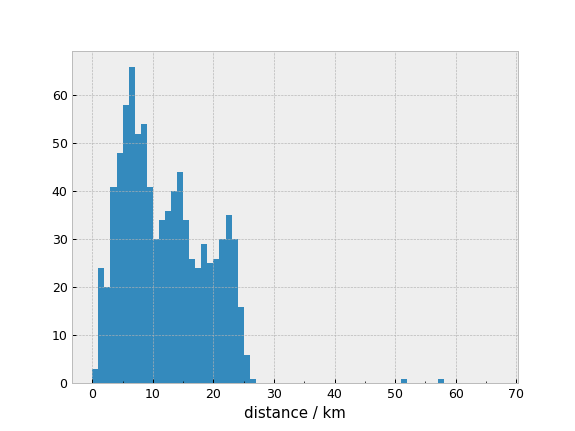

12.01738606333286


In [11]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

plt.style.use('bmh')
%matplotlib notebook
bins = np.arange(0., 68., 1)

fig, axs = plt.subplots()
axs.hist(differences, bins=bins)
axs.set_xlabel('distance / km')
axs.xaxis.set_major_locator(MultipleLocator(10))
axs.xaxis.set_minor_locator(AutoMinorLocator(2))
fig.savefig('locationuncert_glast.pdf')

print(np.mean(differences))

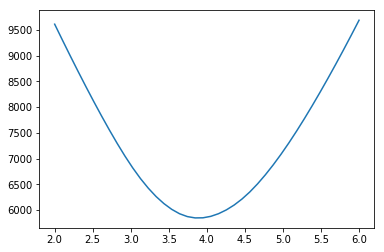

3.846153846153846


In [37]:
plt.plot(ran+4., randiff)
plt.show()
print(ran[np.argmin(randiff)]+4)